In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import xgboost as xgb

In [2]:
# Load the data
df = pd.read_csv('../DataSets/Gradient/Expanded_data_with_more_features.csv')

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [5]:
# Data cleaning
df.dropna(inplace=True)

cat_cols = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
            'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']

enc = OrdinalEncoder()
df[cat_cols] = enc.fit_transform(df[cat_cols])

In [6]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,0.0,1.0,3.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,87,93,91
4,1.0,2.0,4.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,76,78,75
5,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,73,84,79
6,0.0,1.0,4.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,85,93,89
7,1.0,1.0,4.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,2.0,41,43,39


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['MathScore', 'ReadingScore', 'WritingScore']), df[[
    'MathScore', 'ReadingScore', 'WritingScore']], test_size=0.2, random_state=40)

In [8]:
# Model
xg_reg = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=4,
    n_estimators=800
)

In [9]:
# Training
xg_reg.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_test, y_test)], early_stopping_rounds=100)

[0]	validation_0-rmse:62.80408
[1]	validation_0-rmse:56.82232
[2]	validation_0-rmse:51.47060
[3]	validation_0-rmse:46.68585
[4]	validation_0-rmse:42.41438
[5]	validation_0-rmse:38.60729
[6]	validation_0-rmse:35.22114
[7]	validation_0-rmse:32.21796
[8]	validation_0-rmse:29.56083
[9]	validation_0-rmse:27.21850
[10]	validation_0-rmse:25.15772
[11]	validation_0-rmse:23.35561
[12]	validation_0-rmse:21.78400
[13]	validation_0-rmse:20.41111
[14]	validation_0-rmse:19.23395
[15]	validation_0-rmse:18.21682
[16]	validation_0-rmse:17.34238
[17]	validation_0-rmse:16.60350
[18]	validation_0-rmse:15.97863
[19]	validation_0-rmse:15.44582
[20]	validation_0-rmse:15.00274
[21]	validation_0-rmse:14.62966
[22]	validation_0-rmse:14.31239
[23]	validation_0-rmse:14.05438
[24]	validation_0-rmse:13.83859
[25]	validation_0-rmse:13.66374
[26]	validation_0-rmse:13.51847


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
D:\Anaconda\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:13.39182
[28]	validation_0-rmse:13.29087
[29]	validation_0-rmse:13.20270
[30]	validation_0-rmse:13.13512
[31]	validation_0-rmse:13.07027
[32]	validation_0-rmse:13.02050
[33]	validation_0-rmse:12.97930
[34]	validation_0-rmse:12.94908
[35]	validation_0-rmse:12.92218
[36]	validation_0-rmse:12.89628
[37]	validation_0-rmse:12.87706
[38]	validation_0-rmse:12.86267
[39]	validation_0-rmse:12.84935
[40]	validation_0-rmse:12.83705
[41]	validation_0-rmse:12.82862
[42]	validation_0-rmse:12.81621
[43]	validation_0-rmse:12.81108
[44]	validation_0-rmse:12.80267
[45]	validation_0-rmse:12.79659
[46]	validation_0-rmse:12.79399
[47]	validation_0-rmse:12.79007
[48]	validation_0-rmse:12.78699
[49]	validation_0-rmse:12.78194
[50]	validation_0-rmse:12.77840
[51]	validation_0-rmse:12.77526
[52]	validation_0-rmse:12.77384
[53]	validation_0-rmse:12.77259
[54]	validation_0-rmse:12.76893
[55]	validation_0-rmse:12.76731
[56]	validation_0-rmse:12.76371
[57]	validation_0-rmse:12.76260
[58]	val

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [10]:
# Predictions
y_pred = xg_reg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 12.749812855540853


** This RMSE score means that, on average, the models predicted value is about 12.75 units away from the actual value. Since the model is trying to predict a score from 0 - 100, on average it is off by +-12.75%. **

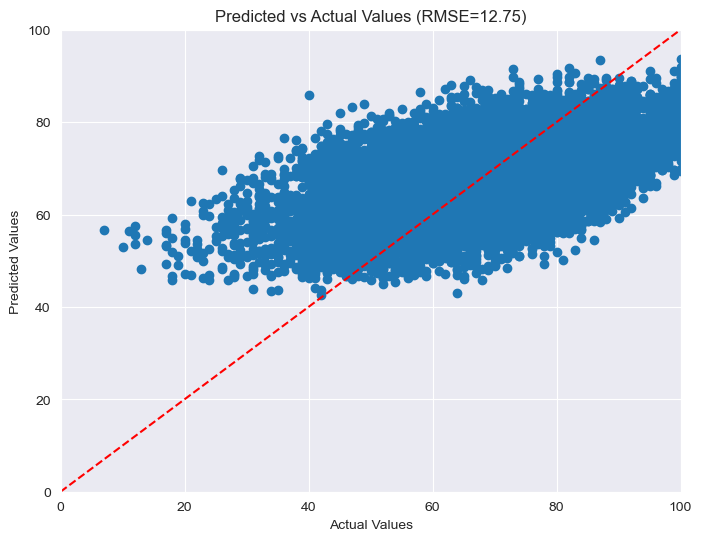

In [11]:
# Plot predicted vs actual values
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 100], [0, 100], "--", color="red")
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values (RMSE={:.2f})".format(rmse))
plt.show()

- The x-axis shows the actual values of the target variable (i.e., the actual score) for the test set.
- The y-axis shows the predicted values of the target variable generated by the XGBoost model for the corresponding samples in the test set.
- Each point on the plot represents a sample from the test set. The position of the point on the plot indicates the predicted value and the actual value for that sample.
- The red dashed line represents the ideal prediction line where the predicted and actual values are exactly the same. If the model was perfect, all points would fall on this line.
- The blue dots represent the predicted versus actual values for each sample in the test set. If a point falls on the red dashed line, it means that the predicted value is the same as the actual value, indicating a perfect prediction. Points that fall above or below the red dashed line indicate overestimation or underestimation of the target variable, respectively.

In [12]:
# Predicted vs actual values
pd.DataFrame({
    'Actual Math Score': y_test['MathScore'].values,
    'Predicted Math Score': y_pred[:, 0],

    'Actual Reading Score': y_test['ReadingScore'].values,
    'Predicted Reading Score': y_pred[:, 1],

    'Actual Writing Score': y_test['WritingScore'].values,
    'Predicted Writing Score': y_pred[:, 2]
}).head(10)

,Actual Math Score,Predicted Math Score,Actual Reading Score,Predicted Reading Score,Actual Writing Score,Predicted Writing Score
0,82,61.383411,97,69.650520,95,68.230293
1,51,72.721642,51,68.577904,44,65.639236
2,59,71.540382,55,68.857407,61,70.100739
3,63,72.377045,73,79.680153,73,81.500870
4,82,78.470329,84,81.626793,85,81.379700
5,88,76.721176,73,72.040092,75,73.409134
6,71,50.293858,66,50.330776,64,46.949123
7,82,68.924477,79,64.787964,75,62.671570
8,75,72.652519,63,68.191406,52,66.075867
9,61,62.042786,70,72.665108,67,73.673790


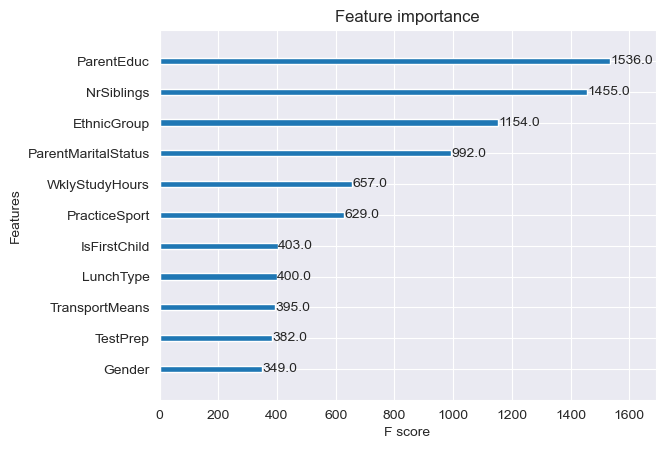

In [13]:
# Feature importance
xgb.plot_importance(xg_reg)
plt.show()